L= [2.72073297 1.22179954 0.00505605 0.05241145]
A= [[ 0.48727267  0.52733742  0.48528898 -0.49897415]
 [ 0.5105362   0.47399677 -0.47382714  0.53867216]
 [ 0.50831859 -0.48074769 -0.50632338 -0.50411358]
 [ 0.49348793 -0.51587204  0.532559    0.45467198]]


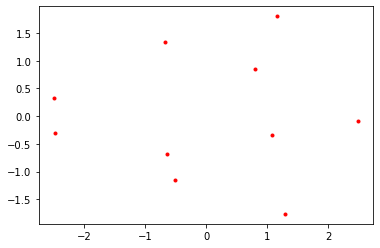

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

x1 = [86, 71, 42, 62, 96, 39, 50, 78, 51, 89] 
x2 = [79, 75, 43, 58, 97, 33, 53, 66, 44, 92]
x3 = [67, 78, 39, 98, 61, 45, 64, 52, 76, 93]
x4 = [68, 84, 44, 95, 63, 50, 72, 47, 72, 91]


x1h = (x1-np.mean(x1))/np.std(x1, ddof=1)
x2h = (x2-np.mean(x2))/np.std(x2, ddof=1)
x3h = (x3-np.mean(x3))/np.std(x3, ddof=1)
x4h = (x4-np.mean(x4))/np.std(x4, ddof=1)

COV = np.cov([x1h, x2h, x3h, x4h])
L, A = np.linalg.eig(COV)

z1 = A[0,0] * (x1h-np.mean(x1h)) + A[1,0] * (x2h-np.mean(x2h)) + A[2,0] * (x3h-np.mean(x3h)) + A[3,0] * (x4h-np.mean(x4h))
z2 = A[0,1] * (x1h-np.mean(x1h)) + A[1,1] * (x2h-np.mean(x2h)) + A[2,1] * (x3h-np.mean(x3h)) + A[3,1] * (x4h-np.mean(x4h))


frame = pd.DataFrame({'X1' : x1, 'X2' : x2, 'x3' : x3, 'x4' : x4, 'x1h':x1h, 'x2h':x2h, 'x3h':x3h, 'x4h':x4h, 'z1':z1, 'z2':z2})
frame = frame.assign(z1_order=len(frame.z1) - stats.mstats.rankdata(frame.z1)+1)
print("L=", L)
print("A=", A)
plt.plot(z1, z2, '.', color = 'red')

In [4]:
frame

,X1,X2,x3,x4,x1h,x2h,x3h,x4h,z1,z2,z1_order
0,86,79,67,68,0.954063,0.695858,-0.015489,-0.033377,0.795805,0.857612,5.0
1,71,75,78,84,0.223913,0.510296,0.552456,0.856673,1.073212,-0.347569,4.0
2,42,43,39,44,-1.187711,-0.974201,-1.461168,-1.368451,-2.494157,0.320306,10.0
3,62,58,98,95,-0.214177,-0.278343,1.585083,1.468582,1.283987,-1.764503,2.0
4,96,97,61,63,1.440830,1.530887,-0.325278,-0.311517,1.164576,1.802518,3.0
5,39,33,45,50,-1.333741,-1.438106,-1.151379,-1.034683,-2.479972,-0.297702,9.0
6,50,53,64,72,-0.798297,-0.510296,-0.170384,0.189136,-0.642786,-0.678509,7.0
7,78,66,52,47,0.564649,0.092781,-0.789960,-1.201567,-0.672004,1.341365,8.0
8,51,44,76,72,-0.749621,-0.927810,0.449193,0.189136,-0.517281,-1.148600,6.0
9,89,92,93,91,1.100093,1.298935,1.326926,1.246069,2.488620,-0.084918,1.0


In [10]:
frame2 = frame.drop(columns = ['X1', 'X2', 'x3', 'x4', 'z1', 'z2', 'z1_order'])
frame2

,x1h,x2h,x3h,x4h
0,0.954063,0.695858,-0.015489,-0.033377
1,0.223913,0.510296,0.552456,0.856673
2,-1.187711,-0.974201,-1.461168,-1.368451
3,-0.214177,-0.278343,1.585083,1.468582
4,1.440830,1.530887,-0.325278,-0.311517
5,-1.333741,-1.438106,-1.151379,-1.034683
6,-0.798297,-0.510296,-0.170384,0.189136
7,0.564649,0.092781,-0.789960,-1.201567
8,-0.749621,-0.927810,0.449193,0.189136
9,1.100093,1.298935,1.326926,1.246069


array([[<AxesSubplot:xlabel='x1h', ylabel='x1h'>,
        <AxesSubplot:xlabel='x2h', ylabel='x1h'>,
        <AxesSubplot:xlabel='x3h', ylabel='x1h'>,
        <AxesSubplot:xlabel='x4h', ylabel='x1h'>],
       [<AxesSubplot:xlabel='x1h', ylabel='x2h'>,
        <AxesSubplot:xlabel='x2h', ylabel='x2h'>,
        <AxesSubplot:xlabel='x3h', ylabel='x2h'>,
        <AxesSubplot:xlabel='x4h', ylabel='x2h'>],
       [<AxesSubplot:xlabel='x1h', ylabel='x3h'>,
        <AxesSubplot:xlabel='x2h', ylabel='x3h'>,
        <AxesSubplot:xlabel='x3h', ylabel='x3h'>,
        <AxesSubplot:xlabel='x4h', ylabel='x3h'>],
       [<AxesSubplot:xlabel='x1h', ylabel='x4h'>,
        <AxesSubplot:xlabel='x2h', ylabel='x4h'>,
        <AxesSubplot:xlabel='x3h', ylabel='x4h'>,
        <AxesSubplot:xlabel='x4h', ylabel='x4h'>]], dtype=object)

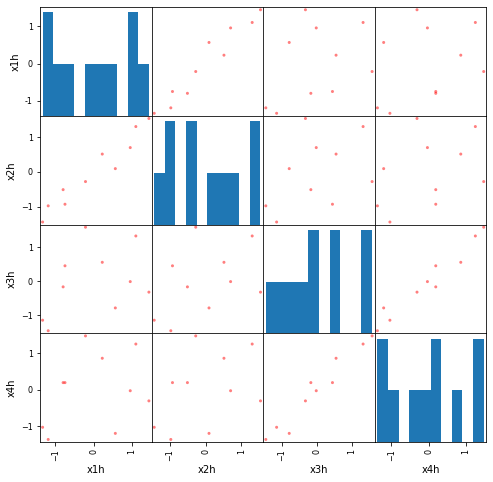

In [12]:
pd.plotting.scatter_matrix(frame2, alpha=0.5, figsize=(8, 8), color = 'red')